In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlsxwriter

In [15]:
data1 = np.loadtxt('../data/johnson_widerstand.txt', skiprows=1)
R = data1[:,0] # in Ohm
R_err = 0.01 * R    # 1% Messunsicherheit
G = data1[:,1]  # Gain
U_DMM = data1[:,2]  # in Volt
U_DMM_err = np.full_like(U_DMM, 0.005)  # 5mV Messunsicherheit

T = 21.4 +273.15    # Raumtemperatur in Kelvin
T_err = 0.1            # Temperaturschwankung über die Zeit in Kelvin
k_B = 1.380649e-23  # Boltzmann-Konstante in J/K
delta_f = 6429.89   # in Hz
delta_f_err = 641.56  # 5% Unsicherheit
const = 4 * k_B * T * delta_f  # 
const_err = np.sqrt( (4*k_B* T_err * delta_f)**2 + (4*k_B * T * delta_f_err)**2 )
def U_J_squared(U, G):
    return (U * 10) / (600 * G)**2  # in Volt_squared

def U_J_squared_err(U, U_err, G):
    return np.sqrt(((10*U_err)/(600*G)**2)**2)

U_J2 = U_J_squared(U_DMM, G)
U_J2_err = U_J_squared_err(U_DMM, U_DMM_err, G)

for Ri, R_erri, Gi, U_DMMi, U_DMM_erri, U_J2i, U_J2_erri in zip(R, R_err, G, U_DMM, U_DMM_err, U_J2, U_J2_err):
    print(f"R: {Ri:.2f} ± {R_erri:.2f} Ohm, G: {Gi:.2f}, U_DMM: {U_DMMi:.3f} ± {U_DMM_erri:.3f} V, U_J^2: {U_J2i*10**12:.6f} ± {U_J2_erri*10**12:.6f} V²")


R: 1.00 ± 0.01 Ohm, G: 2000.00, U_DMM: 1.003 ± 0.005 V, U_J^2: 6.963889 ± 0.034722 V²
R: 10.00 ± 0.10 Ohm, G: 2000.00, U_DMM: 1.004 ± 0.005 V, U_J^2: 6.973611 ± 0.034722 V²
R: 100.00 ± 1.00 Ohm, G: 2000.00, U_DMM: 1.026 ± 0.005 V, U_J^2: 7.122917 ± 0.034722 V²
R: 1000.00 ± 10.00 Ohm, G: 1500.00, U_DMM: 0.714 ± 0.005 V, U_J^2: 8.813580 ± 0.061728 V²
R: 10000.00 ± 100.00 Ohm, G: 1000.00, U_DMM: 0.924 ± 0.005 V, U_J^2: 25.675000 ± 0.138889 V²
R: 100000.00 ± 1000.00 Ohm, G: 400.00, U_DMM: 0.840 ± 0.005 V, U_J^2: 145.781250 ± 0.868056 V²
R: 1000000.00 ± 10000.00 Ohm, G: 300.00, U_DMM: 0.880 ± 0.005 V, U_J^2: 271.481481 ± 1.543210 V²


In [22]:
''' 
# linear fit an die Messwerte
x = R
x_err = R_err
y = U_J2
y_err = U_J2_err

def linear_func(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear_func, x, y, sigma=y_err, absolute_sigma=True)
m_fit, b_fit = popt
m_fit_err, b_fit_err = np.sqrt(np.diag(pcov))
print(f"Fit-Ergebnisse: m = {m_fit:.3e} ± {m_fit_err:.3e}, b = {b_fit:.3e} ± {b_fit_err:.3e}")

# -- compute chi^2
y_fit = linear_func(x, *popt)
chi2 = np.sum(((y - y_fit) / y_err) ** 2)
dof = len(y) - len(popt)
reduced_chi2 = chi2 / dof
print(f"Chi^2: {chi2:.2f}, dof: {dof}, reduced Chi^2: {reduced_chi2:.2f}")

# Berechne Boltzmann-Konstante aus dem Anstieg
k_B_fit = m_fit / (4* T * delta_f)
k_B_fit_err = np.sqrt(
    (m_fit_err / (4 * T * delta_f))**2 +
    ((m_fit * T_err) / (4*delta_f*T**2))**2 +
    ((m_fit * delta_f_err) / (4* T * delta_f**2))**2
)

print(f"Bestimmte Boltzmann-Konstante: k_B = {k_B_fit:.3e} ± {k_B_fit_err:.3e} J/K")
# plot the results
fig, ax = plt.subplots()
ax.errorbar(R, U_J2*10**10, xerr=R_err, yerr=U_J2_err*10**10, fmt='.', label='Messdaten', capsize=2)
x_fit = np.linspace(min(R)*0.9, max(R)*1.1, 100)
y_fit = linear_func(x_fit, *popt)
ax.plot(x_fit, y_fit*10**10, 'r--', label='Lineare Anpassung')
#ax.set_xscale('log')
ax.set_xlabel('Widerstand R (Ohm)')
ax.set_ylabel(r'$U_J^2 \cdot 10^{10}$ (V$^2$)')
plt.grid()
plt.legend()
#plt.savefig('../figures/johnson_rauschen.png', dpi=300)   
plt.show()
'''

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_881/1748330522.py:1: SyntaxWarning: invalid escape sequence '\c'
  '''


' \n# linear fit an die Messwerte\nx = R\nx_err = R_err\ny = U_J2\ny_err = U_J2_err\n\ndef linear_func(x, m, b):\n    return m * x + b\n\npopt, pcov = curve_fit(linear_func, x, y, sigma=y_err, absolute_sigma=True)\nm_fit, b_fit = popt\nm_fit_err, b_fit_err = np.sqrt(np.diag(pcov))\nprint(f"Fit-Ergebnisse: m = {m_fit:.3e} ± {m_fit_err:.3e}, b = {b_fit:.3e} ± {b_fit_err:.3e}")\n\n# -- compute chi^2\ny_fit = linear_func(x, *popt)\nchi2 = np.sum(((y - y_fit) / y_err) ** 2)\ndof = len(y) - len(popt)\nreduced_chi2 = chi2 / dof\nprint(f"Chi^2: {chi2:.2f}, dof: {dof}, reduced Chi^2: {reduced_chi2:.2f}")\n\n# Berechne Boltzmann-Konstante aus dem Anstieg\nk_B_fit = m_fit / (4* T * delta_f)\nk_B_fit_err = np.sqrt(\n    (m_fit_err / (4 * T * delta_f))**2 +\n    ((m_fit * T_err) / (4*delta_f*T**2))**2 +\n    ((m_fit * delta_f_err) / (4* T * delta_f**2))**2\n)\n\nprint(f"Bestimmte Boltzmann-Konstante: k_B = {k_B_fit:.3e} ± {k_B_fit_err:.3e} J/K")\n# plot the results\nfig, ax = plt.subplots()\nax.err

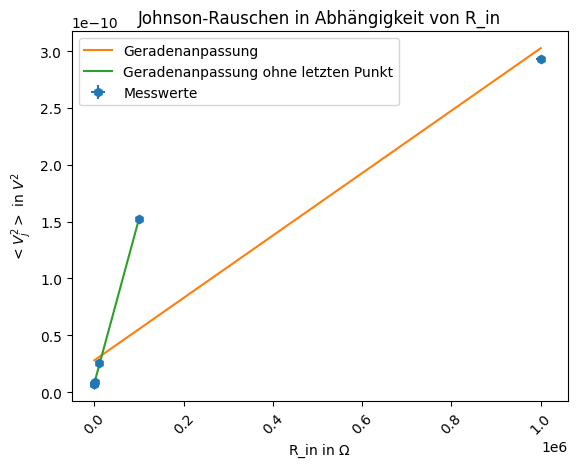

1.443800671061839e-15
7.972977272941323e-12


In [ ]:
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

x = np.array([1, 10, 100, 1000, 10000, 100000, 1000000]) #R_in in Ohm
y = np.array([6.96, 6.97, 7.12, 8.81, 25.67, 145.78, 271.48])*10**(-12) #Johnson noise in 10^-12 V^2
x_err = 0.01*x #1%
y_err = np.array([3.47, 3.47, 3.47, 6.17, 13.8, 86.8, 154])*10**(-15)

x2 = np.array([1, 10, 100, 1000, 10000, 100000]) #R_in in Ohm
y2 = np.array([6.96, 6.97, 7.12, 8.81, 25.67, 145.78])*10**(-12) #Johnson noise in 10^-12 V^2
x2_err = 0.01*x #1%
y2_err = np.array([3.47, 3.47, 3.47, 6.17, 13.8, 86.8])*10**(-15)


coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

coef2 = np.polyfit(x2, y2, 1)
poly1d_fn2 = np.poly1d(coef2)

#plotten
fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=x_err, yerr=y_err, ls='none', marker='h', label='Messwerte')
#ax.errorbar(x2, y2, xerr=x2_err, yerr=y2_err, ls='none', marker='h')
plt.plot(x, poly1d_fn(x), label='Geradenanpassung')
plt.plot(x2, poly1d_fn2(x2), label='Geradenanpassung ohne letzten Punkt')
ax.legend(loc ='upper left')
ax.set_title('Johnson-Rauschen in Abhängigkeit von R_in')
ax.set_xlabel(r'R_in in $\Omega$')
ax.set_ylabel(r'$<V_j^2>$ in $V^2$')
ax.tick_params(axis='x', labelrotation=45)
plt.savefig('P425-R')
plt.show()

slope, intercept = np.polyfit(x2, y2, 1)
print(slope)
print(intercept)